### Задача 1
Даны значения зарплат из выборки выпускников: 100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 24, 57, 55, 70, 75, 65, 84, 90, 150. Посчитать (желательно без использования статистических методов наподобие std, var, mean) среднее арифметическое, среднее квадратичное отклонение, смещенную и несмещенную оценки дисперсий для данной выборки.


In [1]:
import numpy as np
import math
from matplotlib import pyplot as plt

In [2]:
salary_1 = np.array([100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 24, 57, 55, 70, 75, 65, 84, 90, 150])
salary_1

array([100,  80,  75,  77,  89,  33,  45,  25,  65,  17,  30,  24,  57,
        55,  70,  75,  65,  84,  90, 150])

In [3]:
mo_1 = sum(salary_1) / len(salary_1)
mo_1

65.3

In [4]:
print(f'Check MO: {salary_1.mean()}')

Check MO: 65.3


In [5]:
salary_diff = np.array(list(map(lambda x: (x - mo_1)**2, salary_1)))
salary_diff

array([1.20409e+03, 2.16090e+02, 9.40900e+01, 1.36890e+02, 5.61690e+02,
       1.04329e+03, 4.12090e+02, 1.62409e+03, 9.00000e-02, 2.33289e+03,
       1.24609e+03, 1.70569e+03, 6.88900e+01, 1.06090e+02, 2.20900e+01,
       9.40900e+01, 9.00000e-02, 3.49690e+02, 6.10090e+02, 7.17409e+03])

In [6]:
var_1 = sum(salary_diff) / (len(salary_1) - 1)
var_1

1000.1157894736842

In [7]:
print(f'Check variance(dispersion) non-biased: {salary_1.var(ddof=1)}')

Check variance(dispersion) non-biased: 1000.1157894736842


In [8]:
var_1a = sum(salary_diff) / len(salary_1)
var_1a

950.11

In [9]:
print(f'Check biased variance: {salary_1.var(ddof=0)}')

Check biased variance: 950.11


In [10]:
std_1 = math.sqrt(sum(salary_diff) / (len(salary_1) - 1))
std_1

31.624607341019814

In [11]:
print(f'Check non-biased std deviation: {salary_1.std(ddof=1)}')

Check non-biased std deviation: 31.624607341019814


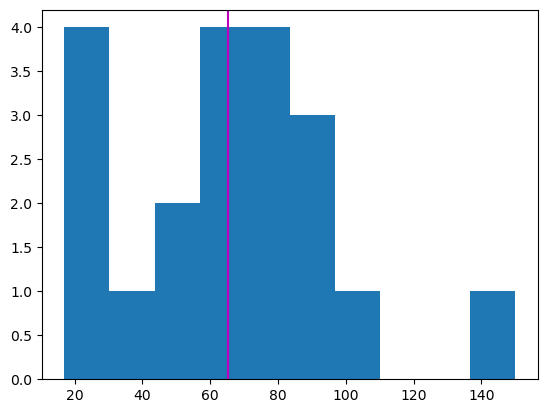

In [12]:
plt.hist(salary_1)
plt.axvline(x=mo_1, color='m')

### Задача 2
В первом ящике находится 8 мячей, из которых 5 - белые. Во втором ящике - 12 мячей, из которых 5 белых. Из первого ящика вытаскивают случайным образом два мяча, из второго - 4. Какова вероятность того, что 3 мяча белые?

In [13]:
def combinations(n, k):
    return math.factorial(n) // (math.factorial(k) * math.factorial(n-k))

In [28]:
# 2 from 1st, 1 from 2nd
p_2from1 = (combinations(5, 2) / combinations(8, 2))
p_1from2 = (combinations(5, 1) * combinations(7, 3) / combinations(12, 4))
p_2from1 * p_1from2

0.12626262626262627

In [29]:
# 1 from 1st, 2 from 2nd
p_1from1 = (combinations(5, 1) * combinations(3, 1) / combinations(8, 2))
p_2from2 = (combinations(5, 2) * combinations(7, 2) / combinations(12, 4))
p_1from1 * p_2from2

0.22727272727272727

In [30]:
# 0 from 1st, 3 from 2nd
p_0from1 = (combinations(3, 2) / combinations(8, 2))
p_3from2 = (combinations(5, 3) * combinations(7, 1) / combinations(12, 4))
p_0from1 * p_3from2

0.01515151515151515

In [31]:
p_2from1 * p_1from2 + p_1from1 * p_2from2 + p_0from1 * p_3from2

0.3686868686868687

### Задача 3
На соревновании по биатлону один из трех спортсменов стреляет и попадает в мишень. Вероятность попадания для первого спортсмена равна 0.9, для второго — 0.8, для третьего — 0.6. Найти вероятность того, что выстрел произведен: a). первым спортсменом б). вторым спортсменом в). третьим спортсменом.


In [16]:
# используем формулу Байеса
p_hit = 0.9*(1/3) + 0.8*(1/3) + 0.6*(1/3)
p_3_1 = (0.9 * (1/3)) / p_hit
p_3_1

0.391304347826087

In [17]:
p_3_2 = (0.8 * (1/3)) / p_hit
p_3_2

0.3478260869565218

In [18]:
p_3_3 = (0.6 * (1/3)) / p_hit
p_3_3

0.2608695652173913

### Задача 4
В университет на факультеты A и B поступило равное количество студентов, а на факультет C студентов поступило столько же, сколько на A и B вместе. Вероятность того, что студент факультета A сдаст первую сессию, равна 0.8. Для студента факультета B эта вероятность равна 0.7, а для студента факультета C - 0.9. Студент сдал первую сессию. Какова вероятность, что он учится: a). на факультете A б). на факультете B в). на факультете C?


In [19]:
# используем формулу Байеса
p_pass = 0.8*0.25 + 0.7*0.25 + 0.9*0.5
p_f1 = 0.8*0.25 / p_pass
p_f1

0.24242424242424246

In [20]:
p_f2 = 0.7*0.25 / p_pass
p_f2

0.21212121212121213

In [21]:
p_f3 = 0.9*0.5 / p_pass
p_f3

0.5454545454545455

### Задача 5
Устройство состоит из трех деталей. Для первой детали вероятность выйти из строя в первый месяц равна 0.1, для второй - 0.2, для третьей - 0.25. Какова вероятность того, что в первый месяц выйдут из строя: а). все детали б). только две детали в). хотя бы одна деталь г). от одной до двух деталей?

In [22]:
p_p1 = 0.1
p_p2 = 0.2
p_p3 = 0.25

all_det = p_p1 * p_p2 * p_p3
all_det

0.005000000000000001

In [23]:
p_2parts = p_p1*p_p2*(1-p_p3) + p_p2*p_p3*(1-p_p1) + p_p1*p_p3*(1-p_p2)
p_2parts

0.08000000000000002

In [24]:
p_0parts = (1-p_p1)*(1-p_p2)*(1-p_p3)
p_atleast1 = 1 - p_0parts
p_atleast1

0.45999999999999996

In [25]:
p_1part = p_p1*(1-p_p2)*(1-p_p3) + p_p2*(1-p_p1)*(1-p_p3) + p_p3*(1-p_p1)*(1-p_p2)
p_1or2 = p_1part + p_2parts
p_1or2

0.455

In [26]:
#CHECK
all_det + p_0parts + p_1part + p_2parts

1.0